In [13]:
from gensim import corpora , models , similarities
import csv
import jieba
import re
import random
import warnings
warnings.filterwarnings('ignore')
random.seed(4)
    
with open("../data/三国演义.txt", 'r')as f: # 读入文本
    lines = []
    for line in f: #分别对每段分词
        temp = jieba.lcut(line)  #结巴分词 精确模式
        words = []
        for i in temp:
            #过滤掉所有的标点符号
            i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
            if len(i) > 0:
                words.append(i)
        if len(words) > 0:
            lines.append(words)            
            
print(lines[-5:])#预览最后5行分词结果


# 用文本构建Gensim 字典
dictionary = corpora.Dictionary(lines)##方法遍历所有的文本，为每个不重复的单词分配一个单独的整数ID；

# 去除极端的词
dictionary.filter_extremes(no_below=1, no_above=0.8)

# 将字典转化为（ bag of words ） 模型
corpus = [dictionary.doc2bow(text) for text in lines]

# # 运行LDA 模型
# %time
# lda = models.LdaModel(corpus , num_topics=5,
#                             id2word=dictionary ,
#                             update_every=5 ,
#                             chunksize=10000 ,
#                             passes=300)

from gensim.models import Word2Vec
# 调用Word2Vec训练 参数：size: 词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(lines,vector_size = 20, window = 2 , min_count = 3, epochs=7, negative=10,sg=1)
print("孔明的词向量：\n",model.wv.get_vector('孔明'))
print("\n和孔明相关性最高的前20个词语：")
model.wv.most_similar('孔明', topn = 20)# 与孔明最相关的前20个词语

[['自此', '三国', '归于', '晋帝', '司马炎', '为', '一统', '之基', '矣', '此', '所谓', '“', '天下', '大势', '合久必分', '分久必合'], ['者', '也', '后来', '后汉', '皇帝', '刘禅', '亡于', '晋', '泰始', '七年', '魏主曹', '奂', '亡', '于太安', '元年', '吴主孙', '皓亡', '于太康', '四'], ['年', '皆', '善终', '后人', '有', '古风', '一篇', '以', '叙', '其事', '曰'], ['高祖', '提剑入', '咸阳', '炎炎', '红日', '升', '扶桑', '光武', '龙兴', '成', '大统', '金乌', '飞', '上天', '中央', '哀哉', '献帝', '绍海宇', '红轮', '西坠', '咸池', '傍', '何进', '无谋', '中贵乱', '凉州', '董卓', '居朝堂', '王允', '定计', '诛', '逆党', '李', '傕', '郭汜兴', '刀枪', '四方', '盗贼', '如蚁', '聚', '六合', '奸雄', '皆', '鹰扬', '孙坚', '孙策', '起', '江左', '袁绍袁', '术兴', '河梁', '刘焉', '父子', '据', '巴蜀', '刘表', '军旅', '屯', '荆襄', '张燕', '张鲁霸', '南郑', '马腾', '韩遂守', '西凉', '陶谦张', '绣', '公孙瓒', '各逞', '雄才', '占', '一'], ['方', '曹操', '专权', '居', '相府', '牢笼', '英俊', '用', '文武', '威挟', '天子', '令', '诸侯', '总领貌', '貅', '镇', '中土', '楼桑', '玄德本', '皇孙', '义结', '关张', '愿扶主', '东西', '奔走', '恨', '无家', '将', '寡兵', '微作', '羁旅', '南阳', '三顾', '情何', '深', '卧龙', '一见', '分', '寰宇', '先取', '荆州', '后', '取川', '霸业', '图王', '在', '天府', '呜呼', '三载', '逝升遐', '白

[('陆逊', 0.9086556434631348),
 ('关公', 0.9072835445404053),
 ('使者', 0.902204155921936),
 ('接入', 0.8973687887191772),
 ('门吏', 0.8933933973312378),
 ('孙夫人', 0.8889816403388977),
 ('玄德', 0.8878297209739685),
 ('先主', 0.885803759098053),
 ('糜竺', 0.885670006275177),
 ('魏主', 0.8828830122947693),
 ('二嫂', 0.8825209736824036),
 ('后主', 0.8777316808700562),
 ('蔡瑁', 0.8763729333877563),
 ('孔明入', 0.8763530254364014),
 ('礼毕', 0.8743241429328918),
 ('土人', 0.872643768787384),
 ('唤入', 0.8688968420028687),
 ('孙权', 0.8686313629150391),
 ('孟获', 0.8656638860702515),
 ('鲁肃', 0.8645128011703491)]

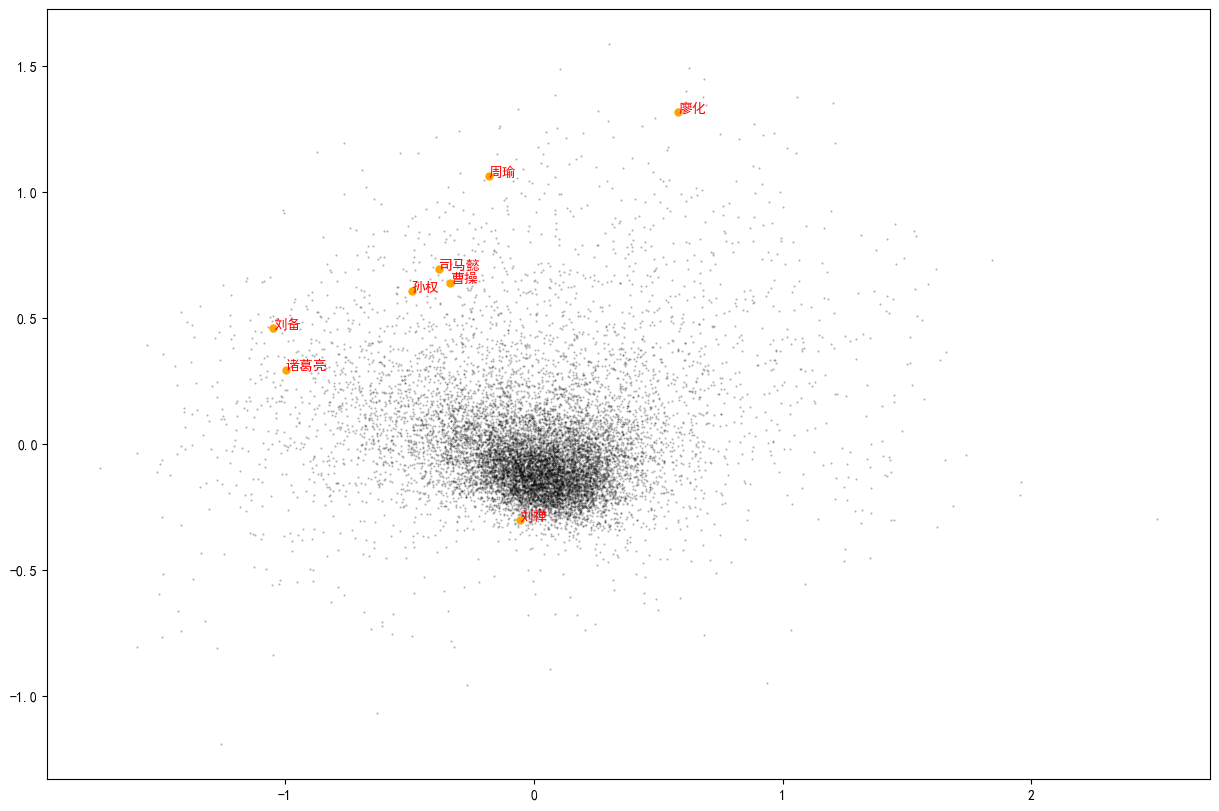

In [14]:
"""
从结果中我们看出，与孔明相关性最高的是玄德、云长、孟获，也符合小说中的角色关系。
接着我们将模型可视化，
"""
import numpy as np
from sklearn.decomposition import PCA
# 将词向量投影到二维空间
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key):
    rawWordVec.append(model.wv[w]) # 词向量
    word2ind[w] = i # {词语:序号}
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)  # PCA降2维
 
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #解决中文显示
plt.rcParams['axes.unicode_minus'] = False   #解决符号无法显示
# 绘制星空图
# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')
 
 
# 绘制几个特殊单词的向量
words = ['孙权', '刘备', '曹操', '周瑜', '诸葛亮', '司马懿','刘禅','廖化']
 
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'orange',markersize=10)
        plt.text(xy[0], xy[1], w, alpha = 1, color = 'red')

In [15]:
"""最后，我们还可以做个类比关系实验，比如，孔明是玄德的军师，那么曹操的军师是谁呢？
我们可以看到 排在最前面的是司马懿，也对上了原小说关系。
"""
# 玄德－孔明＝？－曹操
words = model.wv.most_similar(positive=['玄德', '曹操'], negative=['孔明'])
words

[('司马懿', 0.9272916913032532),
 ('袁绍', 0.8395775556564331),
 ('吕布', 0.8302161693572998),
 ('魏主', 0.8035755753517151),
 ('曹真', 0.8025332093238831),
 ('袁尚', 0.8007213473320007),
 ('雍州', 0.7848342657089233),
 ('周瑜', 0.7815976142883301),
 ('邓艾', 0.7802972197532654),
 ('钟会', 0.7788097262382507)]

In [33]:
"""曹操跟魏国的关系很近（虽然他不是开国皇帝），那么跟蜀国关系最近的谁呢？"""
# 曹操 vs 魏＝玄德 vs ?
words = model.wv.most_similar(positive=['曹操', '魏'], negative=['玄德'])
words

# 我们看到排在最前面的是蜀，也应证了原小说。

[('蜀', 0.8554291129112244),
 ('曹', 0.8499737977981567),
 ('东吴', 0.8101081848144531),
 ('吴', 0.7997751832008362),
 ('诸葛亮', 0.790782630443573),
 ('刘备', 0.78913813829422),
 ('所', 0.7850141525268555),
 ('董卓', 0.782532811164856),
 ('吞', 0.7527328729629517),
 ('兴兵', 0.7460113763809204)]